### Author: Jose Miguel Bautista
### Updated: 05/31/2024

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Algorithms

An **algorithm** is, at heart, a set of instructions to complete a task.  
More specifically, algorithms are a set of specific instructions that take a clear input, and return a well-defined output in finite time. 

The latter half distinguishes algorithms from *heuristics.*  
Heuristics are also instructions, but they are not generally guaranteed to give correct/optimal results, or quantifiable expectation of performance.  
In fact, the book gives a few examples where heuristics fail. 

## Problems Solved by Algorithms

There are [many algorithms](https://en.wikipedia.org/wiki/List_of_algorithms) that have been developed over the years to solve myriad problems, enough that one could compile a "cookbook" of them. 

Some notable ones:
- Sorting
- Route Optimization
- Matrix Manipulations
- Fast Fourier Tranforms

Common to all of them is specificity.  
An algorithm must follow the same guidelines, and use the same steps to accomplish the task for any valid input.  
It does not "improvise" mid-execution. 

Note this class is not a cookbook class.  
We will go over some of the major algorithms, and leave out many others.  
The goal is to impart some idea of how to design algorithms yourself.  

## Evaluating Algorithms 

There's more than one way to skin a cat (though I don't know why you would).  
Similarly, there is more than one algorithm to solve any given problem, and as you'll see later some are not ideal.  
Evaluating which algorithm to use can save you a lot of time and grief.  

Algorithms can be evaluated either before implementation (*a priori*) or after (*a posterior*), and evaluated for 2 qualities:  correctness and efficiency

### Correctness

An algorithm is: 
- **functionally correct** if, for all possible inputs, the desired output will be successfully returned. 
- **partially correct** if, assuming an output is returned, the output is correct. 
- **totally correct** if the desired output is always returned in finite time.

**Incorrect** algorithms either return incorrect output for at least one legal input, or fail to return an output at all and just run endlessly. 

Showing an algorithm is correct (in any sense) is not, in general, a trivial exercise.  
You could do it in a purely *a posteriori* manner by exhaustively checking that every input maps to the correct output.  
But that would both defeat the purpose of having an algorithm in the first place, and be extremely time-consuming.  

So you will need at least some theoretical understanding of why the algorithm should be correct.  
Formally, this refers to a mathematical proof.  
We are not going to rely that heavily on these, as we do not have a full proofs-course on offer.  
Furthermore, I would like to develop your instincts for algorithms, as they are mostly transferrable to other endeavors (e.g. debugging).  

With all that said, consider the following concepts when evaluating algorithms: 
- **Not-incorrectness**: 
Rather than thinking of why the algorithm is correct (for every input), it's worth thinking about if it's incorrect (at least once).  
If you can quickly find a case where an algorithm fails, you save yourself a lot of time defending the algorithm.  
Plus, you have a hook into figuring out specifically *why* the algorithm is incorrect.  
The key of course is that you should find it as quickly as possible.  
This comes with practice, but the book (1.3.3) does go through some common guides like "think small," and "check extreme values."  
- **Logical Continuity (Induction/Recursion)**: 
Failing to find an incorrect case is encouraging, but not the same as proving correctness.  
Put another way, showing the algorithm is correct in a few test cases does not prove it is true for all cases.  
This is because all the cases are treated as stand-alone.  
You cannot determine the behavior of the *space* of inputs-outputs with *points* in the space alone (you need curves at least).  
To fill in the gaps, you need to relate one case to another.  
*Induction* is proving that, if something is true in one case, it must also be true for a related case.  
As long as you can prove this property, and show one specific case that is correct (the *base case*), you can work your way through the space of inputs.  

### Efficiency

Efficiency refers to the amount of resources required for the algorithm to execute, as a function of problem size $n$.  
"Resources" in this case typically refers to 2 values:  
- Time: how long does it take for the algorithm to run .
- Space: how much memory does it take for the algorithm to run.

As techonology becomes more powerful, it is tempting to simply "throw more computer" at problems to solve them.  
Fight this urge.  

For one, there are some problems where brute-force (exhaustive) searching would be implausible.  
As an example, tic-tac-toe can be brute-force solved because it does not have many unique game states (138 total, 14 ending states).  
But there are around $10^{120}$ possible chess games (for reference, the universe is only about $10^{17}$ second old), so it cannot be brute-forced in reasonable time.  

For another, time is money.  
So is computer memory.  
Developing an algorithm allows you to solve problems faster and with fewer resources, which lets you scale things up better.  
In practice, it usually doesn't take that large of a problem for an efficient algorithm on a slow system to beat inefficient algorithms on fast systems.  

We'll talk about asymptotic behavior next, but for now let's say some algorithms scale with the size of the problem $n$.  
If one of the algorithms runs in $\propto n$ time steps, and the other in $\propto n^2$, the former will be faster for large enough applications (regardless of the coefficients).  
This is because $$\lim_{n\rightarrow \infty} \frac{c_1n}{c_2n^2} = 0 \quad \forall \{c_1 > 0, c_2 > 0\}$$  
The code below is a numerical illustration, but you can play around with the numbers and scaling behavior to explore.  

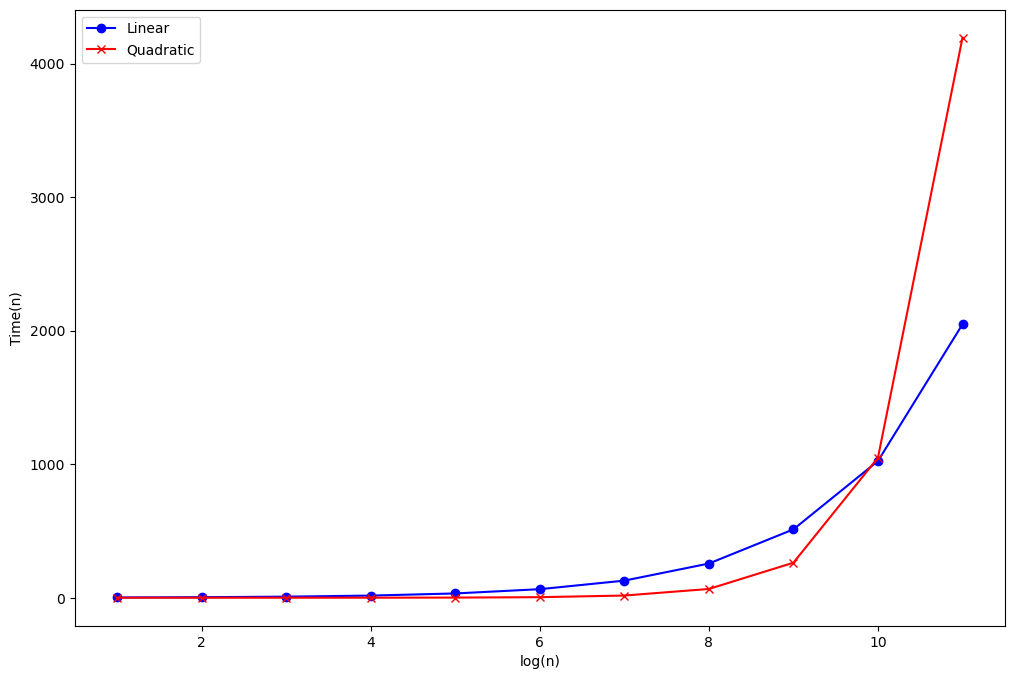

In [5]:
# Numerical demo of dominance
# By default, c_1 = 1, c_2 = 10^-3, and quadratic behavior overtakes linear at ~n = 1024 
c1 = 10**(0)
c2 = 10**(-3)
N = 10

x = np.linspace(1, N+1, N+1)
x2 = 2**x

T1 = c1*(x2)
T2 = c2*(x2**2)

plt.figure(figsize=(12, 8))
plt.plot(x, T1, 
         label = 'Linear', color = 'b', marker='o')
plt.plot(x, T2, 
         label = 'Quadratic', color = 'r', marker='x')
plt.legend()
plt.xlabel(r'log(n)')
plt.ylabel(r'Time(n)')
plt.show()

# Asymptotic Notation

## RAM model
When comparing algorithms, it helps to have a measure of performance.  
We'll go with the runtime $T(n)$ as a function of problem scale $n$.  

Algorithms are similar to abstract concepts, not programs, and do not depend on a language/implementation to be represented.  
So when discussing algorithms, we use a generic representation called a Random Access Machine (RAM) model.  
In this model, the algorithm runs on a generic "[computer](https://en.wikipedia.org/wiki/Turing_machine)" that has 
1. A CPU that handles operations on memory
2. An effectively infinite amount of memory blocks.
   
Each step of an algorithm is a *primitive operation* that: 
- Acts on any memory block
- Cannot be reduced to simpler sub-steps, and 
- Theoretically takes 1 step of time to execute.  

On any given system and any given implementation, step $i$ may execute faster or slower than this, so the actual time cost is denoted $c_i$.  
From this, it is (relatively) straightforward to calculate the runtime per step: it is the number of times the step executes $t_i(n)$ times its cost $c_i$.  
The total cost is the sum over all steps of the algorithm.  
$$T(n) = \sum_{i} c_it_{i}(n)$$

As an example, consider the pseudocode below that just makes a big number called `out`.
| Pseudocode | Cost | # of Executions |
| --- | --- | --- |
| `out = 0` | $c_1$ | $1$ |
| `FOR i = 0 TO n:` | $c_2$ | $\approx n$ |
| `     out += i` | $c_3$ | $\approx n$ |
| `     FOR j = 0 TO n:` | $c_4$ | $\approx n^2$ |
| `          out += j` | $c_5$ | $\approx n^2$ |

Where I have ignored corrections of $\pm 1$ for setting up the loops themselves. 
The corresponding runtime is 
\begin{align}
T(n) &= c_5(n^2) + c_4(n^2) + c_3(n) + c_2(n) + c_1(1)\\
& =(c_5+c_4)n^2 + (c_3+c_2)n + c_1
\end{align}

## Best-Worst-Average Cases

The code example above is very simple, and the runtime equally so, because it has a one-to-one input-output scheme.  
For fixed size $n$ it only ever returns one number deterministically (in a sense, it can't ever be incorrect).  

Compare this with the pseudocode for a sorting algorithm like insertion-sort.  
For this, I will follow the Cormen book to illustrate why I prefer the approximate number of steps.  
We'll discuss sorting algorithms in detail later, just focus on the execution numbers.  
| Pseudocode | Cost | # of Executions |
| --- | --- | --- |
| `FOR i = 2 TO n:` | $c_1$ | $n$ |
| `     key = A[i]` | $c_2$ | $ n-1$ |
| `     // Insert A[i] into the sorted sub-array A[1:i-1]` | $0$ | $n-1$ |
| `     j = i - 1` | $c_4$ | $n-1$ |
| `     WHILE (j>0) AND (A[j]>key)` | $c_5$ | $\sum_{i=2}^{n} t_i$ |
| `          A[j+1] = A[j]` | $c_6$ | $\sum_{i=2}^{n} (t_i-1)$  |
| `          j -= 1` | $c_7$ | $\sum_{i=2}^{n} (t_i-1)$  |
| `     A[j+1] = key` | $c_8$ | $n-1$ |

Now the total runtime is more complicated because of the presence of the `WHILE` loop.  
Intuitively, this should make sense because the time it take to properly order something depends on how disordered it is at the start.  
In the extreme case where the set is already sorted properly, the algorithm just needs to spend time going through the set to verify it (lines 5-7 skipped).  
Any deviations from this order mean the algorithm must spend some (TBD) additional time getting the right order.  

So in the space of legal inputs (fixed size $n$), the algorithm can have a range of execution times, which is captured by cases
- Best-case: the least amount of time it takes for an algorithm to execute. 
- Worst-case: the most amount of time it takes for an algorithm to execute. 
- Average-case: the average amount of time it takes an algorithm to execute, considering all legal inputs. 

The best and worst-case scenarios are typically fringe cases (that may or may not be unique) one would construct when analyzing the algorithm.  
The average case considers all possible inputs in aggregate.  

In the sorting algorithm, the best case scenario is that the input is already sorted, lines 5 runs once per iteration and lines 6-7 are skipped

$$\min\left(T(n)\right) = (c_1 + c_2 + c_4 + c_5 + c_8)n - (c_2 + c_4 + c_5 + c_8)$$

while in the worst case scenario, the input is sorted in reverse order and line 5 runs $\frac{n(n+1)}{2}-1$ times while lines 6-7 run $\frac{n(n-1)}{2}$ times.  

$$\max\left(T(n)\right) = \left(\frac{c_5+c_6+c_7}{2}\right)n^2+\left(c_1 + c_2 + c_4 + \left(\frac{c_5-c_6-c_7}{2}\right) + c_8\right)n - (c_2 + c_4 + c_5 + c_8)$$

## Bounding Functions

You'll notice that I have written the runtime functions as polynomials of $n$.  
If you recall from calculus, at large enough $n$, only the highest order term of the polynomial is important.   

For example, if $f(x) = c_4x^4 + c_3x^3 + c_2x^2 + c_1x^1 + c_0$, then $$ \lim_{x\rightarrow\infty} f(x) = c_4x^4 \propto x^4$$

In [6]:
# Constants randomly chosen
A = 2**12 
c4 = A*np.random.rand()
c3 = A*np.random.rand()
c2 = A*np.random.rand()
c1 = A*np.random.rand()
c0 = A*np.random.rand()

# Pick arbitrarily high test number
x = 2**14

# Make actual and approximation functions evaluated at test number
f1 = c4*x**4 + c3*x**3 + c3*x**3 + c2*x**2 + c1*x**1 + c0
f2 = c4*x**4

# If the limit is correct, their ratio should be close to 1
print(f2/f1)

0.9993621865796404


What this should show you is that the lower order terms don't matter when analyzing runtimes for sufficiently large inputs.  
For that matter, the precise amount of times per step don't matter either; only the highest order term per step has a chance of contributing. 

I will also point out that the constants can always be thought of as "system-dependent" values.  
We can raise or lower them by using a faster/slower computer.  
So the only portions of the runtime function that are practically relevant are the highest order terms.  
For the sorting algorithm, these would be:
\begin{align}
\min\left(T(n)\right) &\propto n \\
\max\left(T(n)\right) &\propto n^2
\end{align}

Put another way, we rarely care about the *exact* behavior of the runtime function everywhere.  
The function could be arbitrarily bumpy and have complicated minima/maxima.  
But when scaling up applications, $n\rightarrow\infty$, the leading order term dominates the function and it has very simple behavior.  
So a more useful way to characterize the runtime is to bound the runtime's scaling behavior.  

### Ex. Big-O Notation
If we wanted to upperbound the runtime, formally we say $g(n$) defines a set $O(g(n))$ as
\begin{align}
O(g(n)) = \{f(n)| \exists (c>0) \& (n_o>0) \text{ s.t. } \forall (n\geq n_o), \quad 0 \leq f(n) \leq cg(n) \}
\end{align}

English: $O(g(n))$ is the set of all functions, $f(n)$, which are always below at least a scaled-version of a bounding function $g(n)$, as long as $n$ is large enough.  

For our sorting algorithm, we know that at worst the runtime is 

$$T(n) = \left(\frac{c_5+c_6+c_7}{2}\right)n^2+ \ldots$$ 

From this form, it is apparent that $T(n)$ is asymptotically bounded above by parabolas with coefficients larger than at least $\frac{c_5+c_6+c_7}{2}$.  
Ergo $T(n)$ is in the set $O(n^2)$, which can be written as either: 

$$T(n)\in O(n^2)\quad \text{OR}\quad T(n) = O(n^2)$$

The former is the actual notation, while the latter is an abuse of notation for composing algorithms together. 

Note that bounding functions can also be asymptotically bounded.  
For instance, $n^2$ is asymptotically bounded above by $n^3$, which means $O(n^2) \subset O(n^3)$.  
So for the worst-case sorting algorithm, it is also correct (if somewhat misleading) to say $T(n) \in O(n^3)$.  

### Common Notations
Below are the definitions of the big letter notations, which all follow a similar structure:
- $O(g(n)) = \{f(n)| \exists (c>0), \exists (n_o>0), \forall (n\geq n_o) \quad \text{ s.t. } \quad 0 \leq f(n) \leq cg(n) \}$
- $\Omega(g(n)) = \{f(n)| \exists (c>0), \exists (n_o>0), \forall (n\geq n_o) \quad \text{ s.t. } \quad 0 \leq cg(n) \leq f(n) \}$
- $\Theta(g(n)) = \{f(n)|  \exists (c_1>0), \exists (c_2>0), \exists (n_o>0), \forall (n\geq n_o) \quad \text{ s.t. } \quad c_1g(n) \leq f(n) \leq c_2g(n) \}$

Big-O, we have gone over as denoting upper boundary functions.  
Big-$\Omega$ is its counterpart and denotes lower boundary function.  
Big-$\Theta$ combines both, and denotes asymptotically tight boundary functions ($f(n)$ is bounded above and below by scaled versions of the same function).  

There are also the lower-cased versions of the first 2
- $o(g(n)) = \{f(n)| \forall (c>0), \exists (n_o>0), \forall (n\geq n_o) \quad \text{ s.t. } \quad 0 \leq f(n) \leq cg(n) \}$
- $\omega(g(n)) = \{f(n)| \forall (c>0), \exists (n_o>0), \forall (n\geq n_o) \quad \text{ s.t. } \quad 0 \leq cg(n) \leq f(n) \}$

These denote strict bounds, because now the inequality has to be satisfied for all positive constants. 
As an example, if $T(n) = 2n^2$, then 
- $T(n) = O(n^2) \quad \text{ AND } \quad T(n) = O(n^3)$
- $T(n) \neq o(n^2) \quad \text{ AND } \quad T(n) = o(n^3)$

### Composition
As shown in the previous pseudocode, nesting a for-loop in a for-loop multiplies the run times while putting steps in series adds them.  
We can apply the same idea to asymptotic notation for the bounds.  

For 2 processes, $f_1(n) =  O(n)$, $f_2(n) = O(n^2)$
- $O(cf_1(n)) = O(f_1(n)) = O(n)$
- $O(f_1(n) + f_2(n)) = O(n^2)$
- $O(f_1(n) - |f_2(n)|) =  O(n^2)$
- $O(f_1(n) \cdot f_2(n)) = O(n \cdot n^2) = O(n^3)$

### Dominance
It is easy to pick out the highest order term of the runtime function if every component is a power of $n$.  
This is not always the case, and there are times when a step goes as a less convenient function like $\log(n)$.  
You could still order the functions yourself using calculus and limits.  

I'm just going to leave this list of common functions with their order of dominance, and let you work it out yourself if you want:
$$1 \ll \log(n) \ll n \ll n\log(n) \ll n^2 \ll n^3 \ll 2^n \ll n!$$


# Addendum: Magic Commands & Performance Measurement

Occasionally, you will need to diagnose a bottleneck in your code.  
You could and should do this with something like the pseudocode tables (as above) as a guide.  
But for debugging and empirical work, you should also take actual measurements.  

One of the nice things about Ipython and Jupyter is that they let you do this easily with *magic commands*.  
Among other things, they let you run [shell commands](https://www.geeksforgeeks.org/basic-shell-commands-in-linux/) like `ls` and `pwd` as if you were in the terminal.  
If you do not know shell commands, at least learn the commands and usage in the first table (file management).  

If you want the full documentation of magic commands, run `%magic` in an empty cell.  
For just the list of commands, you could type `%lsmagic`, but it's probably easier to type `%` and hit the tab-key to pull up a scroll-list.  
**Sidenote:** Using the tab-key to complete your code is both a great speedup, as well as a way to explore code very quickly $\rightarrow$ use it frequently. 

In [7]:
# get all magic commands (uncomment to run)

%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

In [8]:
# get help for a specific magic command (uncomment to run)

%time?

Docstring:
Time execution of a Python statement or expression.

The CPU and wall clock times are printed, and the value of the
expression (if any) is returned.  Note that under Win32, system time
is always reported as 0, since it can not be measured.

This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, you can time the cell body (a directly
  following statement raises an error).

This function provides very basic timing functionality.  Use the timeit
magic for more control over the measurement.

.. versionchanged:: 7.3
    User variables are no longer expanded,
    the magic line is always left unmodified.

Examples
--------
::

  In [1]: %time 2**128
  CPU times: user 0.00 s, sys: 0.00 s, total: 0.00 s
  Wall time: 0.00
  Out[1]: 340282366920938463463374607431768211456L

  In [2]: n = 1000000

  In [3]: %time sum(range(n))
  CPU times: user 1.20 s,

For our purposes, we want a way to measure the execution time and memory requirements of our code.  
Here is a list of the relevant magic commands:
- `time`: Time code execution. 
- `timeit`: Time repeated code execution, gives errorbars on time.  
- `lprun`: Run a line-by-line analysis.  
This ideally gives something similar to the pseudocode tables.

Note that for these to run, you will need the `time` and `line_profiler` libraries installed, and `lprun` also needs you to load the latter in as an extension first.  

Below I leave some demo code for how they work on a function that calculates $100!$.  
Some guiding questions:
1. Why do `%time` and `%timeit` give different numbers?
2. What do the columns in the output of `%lprun` measure?
3. What is the difference between `%time` and `%%time`?
4. What is the difference between `%ls` and `!ls`?

Once again, I will ask you to **READ THE DOCUMENTATION FOR THESE**.  
You can also access help by appending `?` at the end of a command. 

In [27]:
# function to test
def factorial():
    out = 1
    for i in range(1, 10000):
        out *= i
    return out

In [28]:
# demo timer
%time factorial()

CPU times: total: 15.6 ms
Wall time: 17 ms


ValueError: Exceeds the limit (4300 digits) for integer string conversion; use sys.set_int_max_str_digits() to increase the limit

In [8]:
# demo timeit
%timeit factorial()

6.53 µs ± 20.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
%load_ext line_profiler 

ModuleNotFoundError: No module named 'line_profiler'

In [10]:
# demo line profiler
%lprun -f factorial factorial()